In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\admin\Desktop\iNeuron Internship\flights.csv')

C:\Users\admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
airports_df = pd.read_csv(r'C:\Users\admin\Desktop\iNeuron Internship\airports.csv')
airports_col = airports_df['IATA_CODE'].values

In [4]:
dataset = df.loc[df['ORIGIN_AIRPORT'].isin(airports_col)]

In [5]:
dataset.head(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
dataset.shape

(5332914, 31)

In [7]:
dataset.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5332914 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   YEAR                 5332914 non-null  int64  
 1   MONTH                5332914 non-null  int64  
 2   DAY                  5332914 non-null  int64  
 3   DAY_OF_WEEK          5332914 non-null  int64  
 4   AIRLINE              5332914 non-null  object 
 5   FLIGHT_NUMBER        5332914 non-null  int64  
 6   TAIL_NUMBER          5318547 non-null  object 
 7   ORIGIN_AIRPORT       5332914 non-null  object 
 8   DESTINATION_AIRPORT  5332914 non-null  object 
 9   SCHEDULED_DEPARTURE  5332914 non-null  int64  
 10  DEPARTURE_TIME       5249100 non-null  float64
 11  DEPARTURE_DELAY      5249100 non-null  float64
 12  TAXI_OUT             5246302 non-null  float64
 13  WHEELS_OFF           5246302 non-null  float64
 14  SCHEDULED_TIME       5332908 non-null  float64
 15

In [8]:
col = dataset.columns[dataset.dtypes=='object']
col

Index(['AIRLINE', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'CANCELLATION_REASON'],
      dtype='object')

In [9]:
cols = dataset[col].isnull().sum()!=0
cols

AIRLINE                False
TAIL_NUMBER             True
ORIGIN_AIRPORT         False
DESTINATION_AIRPORT    False
CANCELLATION_REASON     True
dtype: bool

In [10]:
# Dropping the column 'TAIL_NUMBER' & 'CANCELLATION_REASON'

dataset.drop([cols.index[1], cols.index[4]], axis=1, inplace=True)

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [11]:
dataset.columns[dataset.dtypes=='object']

Index(['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'], dtype='object')

In [12]:
dataset.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           83814
DEPARTURE_DELAY          83814
TAXI_OUT                 86612
WHEELS_OFF               86612
SCHEDULED_TIME               6
ELAPSED_TIME            101784
AIR_TIME                101784
DISTANCE                     0
WHEELS_ON                89942
TAXI_IN                  89942
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             89942
ARRIVAL_DELAY           101784
DIVERTED                     0
CANCELLED                    0
AIR_SYSTEM_DELAY       4329554
SECURITY_DELAY         4329554
AIRLINE_DELAY          4329554
LATE_AIRCRAFT_DELAY    4329554
WEATHER_DELAY          4329554
dtype: int64

In [13]:
columns = dataset.columns[dataset.isnull().sum()>0]
columns

Index(['DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'WHEELS_ON', 'TAXI_IN',
       'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
       'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [14]:
for i in columns:
    mean = dataset[i].mean()
    dataset[i] = dataset[i].fillna(mean)

<ipython-input-14-4b4edd057c41>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[i] = dataset[i].fillna(mean)


In [15]:
dataset.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64

#### Creating the Target column from Arrival Delay(>10 mins is Delayed)

In [16]:
dataset['Target'] = np.where(dataset['ARRIVAL_DELAY']>=10,1,0)

<ipython-input-16-879b25b8b4a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Target'] = np.where(dataset['ARRIVAL_DELAY']>=10,1,0)


In [17]:
dataset.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,Target
0,2015,1,1,4,AS,98,ANC,SEA,5,2354.0,...,408.0,-22.0,0,0,13.487746,0.077684,18.903429,23.688082,2.980992,0
1,2015,1,1,4,AA,2336,LAX,PBI,10,2.0,...,741.0,-9.0,0,0,13.487746,0.077684,18.903429,23.688082,2.980992,0
2,2015,1,1,4,US,840,SFO,CLT,20,18.0,...,811.0,5.0,0,0,13.487746,0.077684,18.903429,23.688082,2.980992,0
3,2015,1,1,4,AA,258,LAX,MIA,20,15.0,...,756.0,-9.0,0,0,13.487746,0.077684,18.903429,23.688082,2.980992,0
4,2015,1,1,4,AS,135,SEA,ANC,25,24.0,...,259.0,-21.0,0,0,13.487746,0.077684,18.903429,23.688082,2.980992,0


## Exploratory Data Analysis

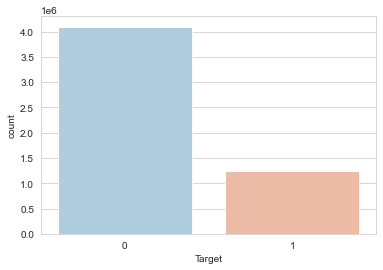

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='Target',data=dataset,palette='RdBu_r')

In [19]:
dataset['Target'].value_counts()

0    4096166
1    1236748
Name: Target, dtype: int64

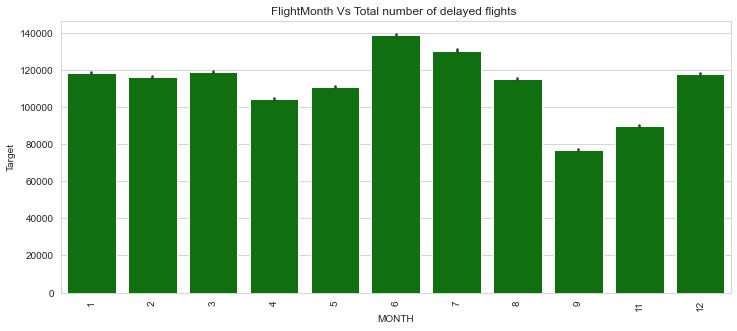

In [20]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 5))
order = np.unique(list(dataset['MONTH']))
ax = sns.barplot(x='MONTH',y ='Target', data=dataset, color = "green" , order = order , estimator = np.sum)
plt.xticks(rotation=90)
fig = plt.title("FlightMonth Vs Total number of delayed flights ")

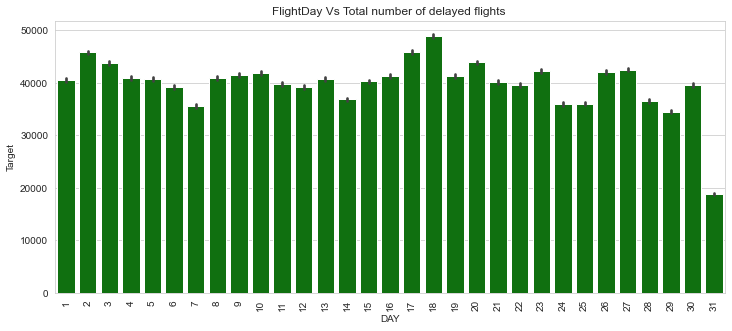

In [21]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 5))
order = np.unique(list(dataset['DAY']))
ax = sns.barplot(x='DAY',y ='Target', data=dataset, color = "green" , order = order , estimator = np.sum)
plt.xticks(rotation=90)
fig = plt.title("FlightDay Vs Total number of delayed flights ")

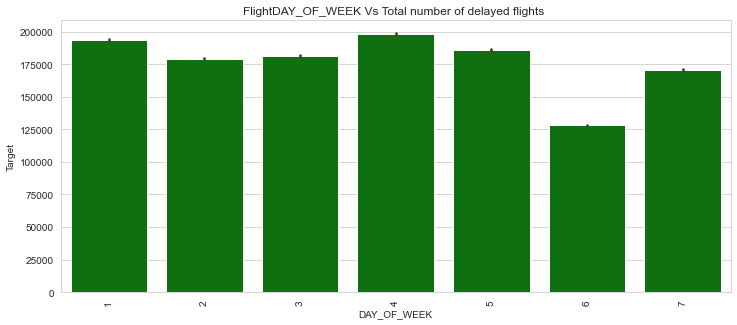

In [22]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 5))
order = np.unique(list(dataset['DAY_OF_WEEK']))
ax = sns.barplot(x='DAY_OF_WEEK',y ='Target', data=dataset, color = "green" , order = order , estimator = np.sum)
plt.xticks(rotation=90)
fig = plt.title("FlightDAY_OF_WEEK Vs Total number of delayed flights ")

In [23]:
def timing(value):
    if value >= 600 and value < 1200:
        return "Morning"
    elif value >= 1200 and value < 1600:
        return "Afternoon"
    else:
        return "Evening"
dataset['Arrival_Timing'] = dataset['ARRIVAL_TIME'].apply(timing)

<ipython-input-23-fa06eeee5d3d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Arrival_Timing'] = dataset['ARRIVAL_TIME'].apply(timing)


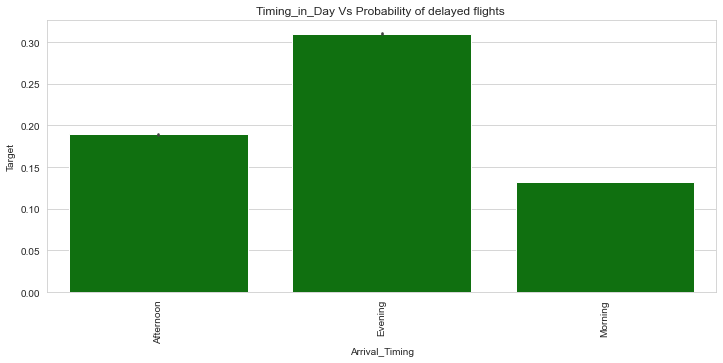

In [24]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 5))
order = np.unique(list(dataset['Arrival_Timing']))
ax = sns.barplot(x='Arrival_Timing',y ='Target', data=dataset, color = "green" , order = order , estimator = np.mean)
plt.xticks(rotation=90)
fig = plt.title("Timing_in_Day Vs Probability of delayed flights ")

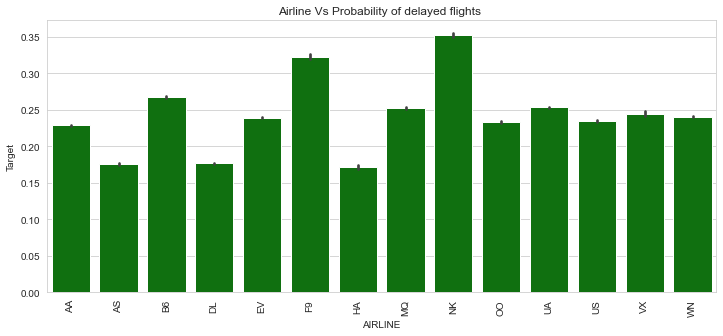

In [25]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 5))
order = np.unique(list(dataset['AIRLINE']))
ax = sns.barplot(x='AIRLINE',y ='Target', data=dataset, color = "green" , order = order , estimator = np.mean)
plt.xticks(rotation=90)
fig = plt.title("Airline Vs Probability of delayed flights ")

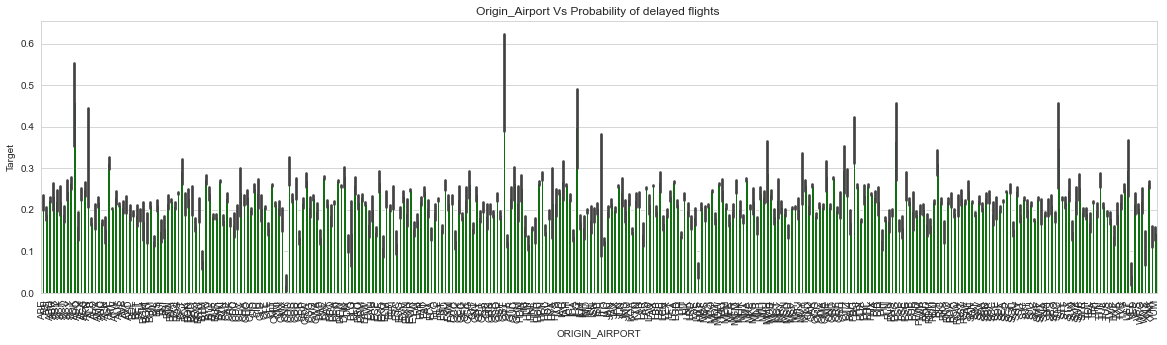

In [26]:
sns.set_style('whitegrid')
plt.figure(figsize=(20, 5))
order = np.unique(list(dataset['ORIGIN_AIRPORT']))
ax = sns.barplot(x='ORIGIN_AIRPORT',y ='Target', data=dataset, color = "green" , order = order , estimator = np.mean)
plt.xticks(rotation=90)
fig = plt.title("Origin_Airport Vs Probability of delayed flights ")

In [27]:
dataset.groupby(['ORIGIN_AIRPORT'])['Target'].mean().sort_values(ascending=False)

ORIGIN_AIRPORT
GST    0.506494
ADK    0.458333
ILG    0.400000
PBG    0.366548
PPG    0.364486
         ...   
WYS    0.105769
BTM    0.079460
LWS    0.052721
VEL    0.043689
CNY    0.019417
Name: Target, Length: 322, dtype: float64

In [28]:
dataset['TAXI_OUT'].head()

0    21.0
1    12.0
2    16.0
3    15.0
4    11.0
Name: TAXI_OUT, dtype: float64

## Feature Engineering

In [29]:
# Remove the column has only one unique variable
for col in dataset.columns:    
    if dataset[col].nunique()==1:        
        dataset.drop(col,axis=1,inplace=True)        

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [30]:
dataset.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
       'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'Target',
       'Arrival_Timing'],
      dtype='object')

In [31]:
crosstab_origin_airport = pd.crosstab(dataset['ORIGIN_AIRPORT'], dataset['Target'], margins=True)
crosstab_origin_airport

Target,0,1,All
ORIGIN_AIRPORT,,,
ABE,1776,498,2274
ABI,1885,444,2329
ABQ,14883,4309,19192
ABR,515,156,671
ABY,682,194,876
...,...,...,...
WYS,186,22,208
XNA,6854,2429,9283
YAK,573,89,662


In [32]:
from scipy.stats import chi2_contingency

In [33]:
def hypothesis(crosstab_table, confidence_interval):
    stat, p, dof, expected = chi2_contingency(crosstab_table)
    print('Chi2 value = {}'.format(stat))
    print('P value = {}'.format(p))
    alpha = 1.0-confidence_interval
    if p<=alpha:
        print('Reject H0')
    else:
        print('Failed to reject H0')

In [34]:
crosstab_airline = pd.crosstab(dataset['AIRLINE'], dataset['Target'], margins=True)
crosstab_desti_airport = pd.crosstab(dataset['DESTINATION_AIRPORT'], dataset['Target'], margins=True)

In [53]:
# Validating categorical features with Target column

result_origin_airport = hypothesis(crosstab_origin_airport, 0.95)
result_airline = hypothesis(crosstab_airline, 0.95)
result_desti_airport = hypothesis(crosstab_desti_airport, 0.95)

print(result_origin_airport)
print(result_airline)
print(result_desti_airport)

Chi2 value = 30821.494539803854
P value = 0.0
Reject H0
Chi2 value = 34881.66483017634
P value = 0.0
Reject H0
Chi2 value = 22605.61508173409
P value = 0.0
Reject H0
None
None
None


In [36]:
dataset.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
       'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'Target',
       'Arrival_Timing'],
      dtype='object')

In [37]:
# Wrapper Method - Forward

columns = ['DAY_OF_WEEK','ORIGIN_AIRPORT','DEPARTURE_DELAY','AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'WEATHER_DELAY','Target']

## Mean Encoding for the categorical features

In [38]:
mean_enc1 = dataset.groupby(['AIRLINE'])['Target'].mean()
dataset['AIRLINE'] = dataset['AIRLINE'].map(mean_enc1)

<ipython-input-38-616f47a9ba5f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['AIRLINE'] = dataset['AIRLINE'].map(mean_enc1)


In [39]:
mean_enc2 = dataset.groupby(['ORIGIN_AIRPORT'])['Target'].mean()
dataset['ORIGIN_AIRPORT'] = dataset['ORIGIN_AIRPORT'].map(mean_enc2)

<ipython-input-39-4a5b153980e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['ORIGIN_AIRPORT'] = dataset['ORIGIN_AIRPORT'].map(mean_enc2)


In [40]:
mean_enc3 = dataset.groupby(['DESTINATION_AIRPORT'])['Target'].mean()
dataset['DESTINATION_AIRPORT'] = dataset['DESTINATION_AIRPORT'].map(mean_enc3)

<ipython-input-40-1a923e30ee86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['DESTINATION_AIRPORT'] = dataset['DESTINATION_AIRPORT'].map(mean_enc3)


In [41]:
df = dataset[columns]
df.head()

,DAY_OF_WEEK,ORIGIN_AIRPORT,DEPARTURE_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,WEATHER_DELAY,Target
0,4,0.169884,-11.0,13.487746,0.077684,18.903429,2.980992,0
1,4,0.258392,-8.0,13.487746,0.077684,18.903429,2.980992,0
2,4,0.243994,-2.0,13.487746,0.077684,18.903429,2.980992,0
3,4,0.258392,-5.0,13.487746,0.077684,18.903429,2.980992,0
4,4,0.220182,-1.0,13.487746,0.077684,18.903429,2.980992,0


In [42]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [43]:
# df.corr()

## Split the dataset

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

## Feature Scaling

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
ss = StandardScaler()
x_train = ss.fit_transform(X_train)
x_test = ss.fit_transform(X_test)

## Model Building using Decision Tree

In [47]:
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [48]:
parameters = {'max_depth':range(3,20),
              'criterion':['gini']}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, cv=5)
clf.fit(X=x_train, y=y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.9562830712296915 {'criterion': 'gini', 'max_depth': 13}


In [49]:
#DTmodel_1 = tree.DecisionTreeClassifier()
#DTfitted_1 = DTmodel_1.fit(x_train, y_train)

In [50]:
DT_predictions_1 = tree_model.predict(x_test)

In [51]:
print("F1-Score:",round(metrics.f1_score(y_test, DT_predictions_1),2) * 100, "%")
print("Recall:",round(metrics.recall_score(y_test, DT_predictions_1),2) * 100, "%")
print("Precision:",round(metrics.precision_score(y_test, DT_predictions_1),2) * 100, "%")
print("Accuracy:",round(metrics.accuracy_score(y_test, DT_predictions_1),2) * 100, "%")

F1-Score: 90.0 %
Recall: 82.0 %
Precision: 99.0 %
Accuracy: 96.0 %


In [52]:
metrics.confusion_matrix(y_test, DT_predictions_1)

array([[1224899,    4365],
       [  65203,  305408]], dtype=int64)